Text(0.5, 1.0, 'Histogram(without using built-in)')

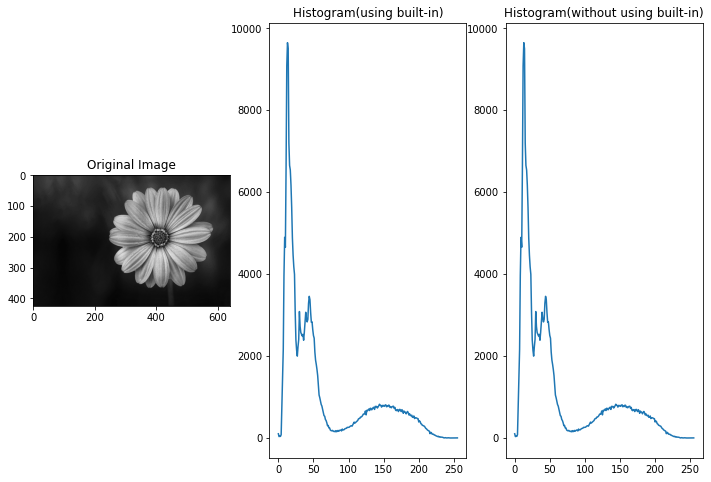

In [22]:
#Histogram using builtin and without builtin function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculateHist(img):
    hist = np.zeros(256)
    rows, cols = img.shape
    for i in range(rows):
        for j in  range(cols):
            intensity = img[i,j]
            hist[intensity] += 1
    return hist

image = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.plot(hist1)
plt.title('Histogram(using built-in)')

hist2 = calculateHist(image)
plt.subplot(1, 3, 3)
plt.plot(hist2)
plt.title('Histogram(without using built-in)')

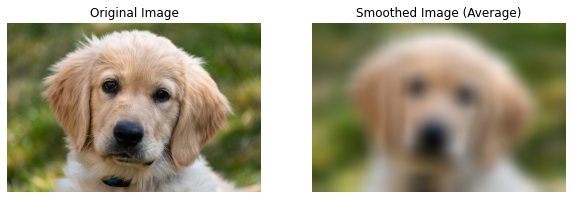

In [29]:
#Average smoothing woth and without using builtin fuction
import cv2
import matplotlib.pyplot as plt

def average_smoothing(image_path, kernel_size=(100, 100)):
    image = cv2.imread(image_path)
    smoothed_image = cv2.blur(image, kernel_size)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
    plt.title('Smoothed Image (Average)')
    plt.axis('off')
    plt.show()

image_path = 'dogy.jpg'
average_smoothing(image_path)


Enter the path to the image file: dogy.jpg
Enter the kernel size for average smoothing: 100


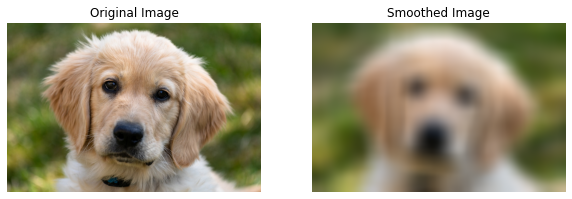

In [30]:
import cv2
import matplotlib.pyplot as plt

def average_smoothing(image, kernel_size):
    smoothed_image = cv2.blur(image, (kernel_size, kernel_size))
    return smoothed_image
image_path = input("Enter the path to the image file: ")
kernel_size = int(input("Enter the kernel size for average smoothing: "))


image = cv2.imread(image_path)

smoothed_image = average_smoothing(image, kernel_size)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.title("Smoothed Image")
plt.axis('off')

plt.show()


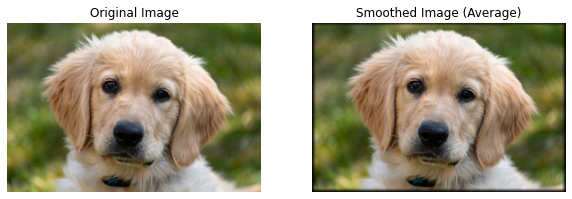

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_smoothing(image_path, kernel_size=(20, 20)):
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    # Define the kernel
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])

    # Initialize an empty smoothed image
    smoothed_image = np.zeros_like(image, dtype=np.float32)

    # Apply average smoothing
    for i in range(height - kernel_size[0] + 1):
        for j in range(width - kernel_size[1] + 1):
            for c in range(channels):
                smoothed_image[i:i+kernel_size[0], j:j+kernel_size[1], c] += \
                    image[i:i+kernel_size[0], j:j+kernel_size[1], c] * kernel[c]

    smoothed_image = smoothed_image.astype(np.uint8)

    # Display the original and smoothed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
    plt.title('Smoothed Image (Average)')
    plt.axis('off')

    plt.show()

# Test the function
image_path = 'dogy.jpg'
average_smoothing(image_path)


enter image::dogy.jpg
enter kernel size::5


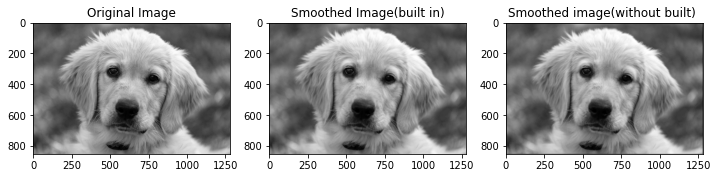

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def average_smooth(img,kernel_size):
    rows,cols=img.shape
    modified_img=np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            sum_1=0
            try:
                for p in range(-(kernel_size//2),kernel_size//2+1):
                    for q in range(-(kernel_size//2),kernel_size//2+1):
                        sum_1+=img[(i+p,j+q)]
            except IndexError as e:
                pass
            modified_img[i,j]=sum_1/(kernel_size**2)
    return modified_img


img=input("enter image::")

# Kernel size for smoothing
kernel_size = int(input("enter kernel size::"))

if img is None:
    print("Error:Unable to load the image")
else:
# Load the image in grayscale mode
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)


# Apply average smoothing using cv2.blur
smoothed_image1 = cv2.blur(img, (kernel_size, kernel_size))
# Display the original and smoothed images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

# Smoothed image
plt.subplot(1, 3, 2)
plt.title("Smoothed Image(built in)")
plt.imshow(smoothed_image1, cmap='gray')

smooth_img2=average_smooth(img,kernel_size)

plt.subplot(1, 3, 3)
plt.title("Smoothed image(without built) ")
plt.imshow(smooth_img2,cmap='gray')

# Show the plots
plt.show()
